# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#progress bar
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from google.colab import output
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# 2. Load Data

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bL5ILyUYtHOC1IiCfcB56LjDhf6OwboU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bL5ILyUYtHOC1IiCfcB56LjDhf6OwboU" -O training.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eHl-ngN0q8qzq3l1uXfF_dVGZNU7P8YY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eHl-ngN0q8qzq3l1uXfF_dVGZNU7P8YY" -O testing.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VqqVTbbAm1MnD5SqjWF7vow3fjSlLWX-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VqqVTbbAm1MnD5SqjWF7vow3fjSlLWX-" -O gabriel_data.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1d19hAQfjvRxOtbYfYSDUWhTVQ2WWsM22' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1d19hAQfjvRxOtbYfYSDUWhTVQ2WWsM22" -O gabriel_final.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CqW36Yx-Lrp3fjGin9_jfDfYwDExPPM3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1CqW36Yx-Lrp3fjGin9_jfDfYwDExPPM3" -O logs.csv && rm -rf /tmp/cookies.txt

gabriel_0 = pd.read_csv('gabriel_data.csv')
gabriel = pd.read_csv('gabriel_final.csv')
logs = pd.read_csv('logs.csv')

gabriel['RHO'] = logs['RHO']
gabriel['U'] = logs['U']
gabriel['ILD'] = logs['ILD']
gabriel['DT'] = logs['DT']
gabriel['GR'] = logs['GR']

old_train = pd.read_csv('training.csv')
old_test = pd.read_csv('testing.csv')

output.clear()

In [ ]:
old_train[['UWI']] = old_train[['UWI']].astype('str')
gabriel[['UWI']] = gabriel[['UWI']].astype('str')
gabriel[['UWI']] = gabriel[['UWI']].astype('str')


In [ ]:
uwi = []
for i in gabriel['UWI'].values:
  uwi.append(i.rstrip('_'))

gabriel[['UWI']] = uwi
a,train_index,c = np.intersect1d(gabriel['UWI'].values,old_train['UWI'].values, return_indices=True)
d,test_index,e = np.intersect1d(gabriel['UWI'].values,old_test['UWI'].values, return_indices=True)

train = gabriel.iloc[train_index,:].reset_index().drop('index',axis=1)
test = gabriel.iloc[test_index,:].reset_index().drop('index',axis=1)

In [ ]:
# Our Best output in Leaderboard
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uXt9TPEUS_ZWFzSVwOH9r-RVip2u1RiX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uXt9TPEUS_ZWFzSVwOH9r-RVip2u1RiX" -O reference.csv && rm -rf /tmp/cookies.txt
output.clear()
reference = pd.read_csv('reference.csv')

# 3. Nearest Neighbors

## 3.1 Train Data

In [ ]:
coords = train[['UWI','SurfaceLatitude_NAD83','SurfaceLongitude_NAD83','Field','BHT','TrueTemp']]
coords 

,UWI,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,Field,BHT,TrueTemp
0,100010107020W500,55.027981,-116.903553,Duvernay,48.330000,60.970000
1,100010608109W500,55.987511,-115.390554,Duvernay,34.260000,63.980000
2,100011206021W400,54.167413,-113.002674,Duvernay,29.000000,39.070000
3,100011506915W500,54.969037,-116.188158,Duvernay,64.000000,69.470000
4,100011804403W500,52.787328,-114.415621,Duvernay,68.000000,75.230000
...,...,...,...,...,...,...
610,42493318190000,29.078411,-98.110357,Eaglebine,76.666667,96.105556
611,42493319370000,29.032056,-98.174977,Eaglebine,78.888889,100.472222
612,42507007550000,28.774927,-99.562068,Eaglebine,65.555556,78.161111
613,42507312960000,29.077015,-100.006558,Eaglebine,67.222222,94.794444


In [ ]:
coords['lat'] = np.nan
coords['lon'] = np.nan

In [ ]:
latitudes = ['SurfaceLatitude_NAD83']
longitudes = ['SurfaceLongitude_NAD83']

for i in latitudes:
  coords['lat'].fillna(coords[i],inplace=True)

for i in longitudes:
  coords['lon'].fillna(coords[i],inplace=True)  

In [ ]:
coords = coords[['UWI','lat','lon','Field','BHT','TrueTemp']]
coords.isna().sum()

UWI         0
lat         0
lon         0
Field       0
BHT         0
TrueTemp    0
dtype: int64

In [ ]:
# Original script By Erick Gutierrez Bossa: https://www.linkedin.com/in/erick-enrique-gutierrez-bossa/

# ----------------------------Find Nearest Neighbors by Euclidean Distance-----------------------#
def distance(x, y,x0=0,y0=0):
    return np.sqrt((x-x0)**2+(y-y0)**2)

def NearestNeighbors(coords,neighbors):

  l=[]

  for i0 in range(len(coords)):
      d=[]
      d_index=[]
      for i in range(len(coords)):
          d.append(distance(coords.iloc[i][1],coords.iloc[i][2],coords.iloc[i0][1],coords.iloc[i0][2])) # Computes distances to Well i0
          d_index.append(i)# Append index distances to d 
      _, list2 = zip(*sorted(zip(d, d_index))) # Sort in ascending order
      l.append(list(list2)[1:neighbors+1])

  coords['NN_list_idx'] = l # Returns a index list of the neighbors but using the coords df
  coords['NN_list'] = coords['NN_list_idx'].apply(lambda x: [list(coords.index.values)[x[i]] for i in range(len(x))])
  neighbors = coords.drop('NN_list_idx',axis=1)  
  
  return neighbors

# -------------------------------Define a function to retrieve neighbors---------------------------#
def get_neighbors(well):
  return neighbors.iloc[well,6]

In [ ]:
neighbors = NearestNeighbors(coords,5)
neighbors

,UWI,lat,lon,Field,BHT,TrueTemp,NN_list
0,100010107020W500,55.027981,-116.903553,Duvernay,48.330000,60.970000,"[298, 337, 208, 107, 355]"
1,100010608109W500,55.987511,-115.390554,Duvernay,34.260000,63.980000,"[253, 344, 167, 130, 48]"
2,100011206021W400,54.167413,-113.002674,Duvernay,29.000000,39.070000,"[54, 371, 218, 357, 7]"
3,100011506915W500,54.969037,-116.188158,Duvernay,64.000000,69.470000,"[237, 78, 186, 31, 187]"
4,100011804403W500,52.787328,-114.415621,Duvernay,68.000000,75.230000,"[345, 240, 109, 174, 264]"
...,...,...,...,...,...,...,...
610,42493318190000,29.078411,-98.110357,Eaglebine,76.666667,96.105556,"[609, 604, 607, 608, 605]"
611,42493319370000,29.032056,-98.174977,Eaglebine,78.888889,100.472222,"[608, 607, 600, 604, 610]"
612,42507007550000,28.774927,-99.562068,Eaglebine,65.555556,78.161111,"[478, 472, 614, 473, 467]"
613,42507312960000,29.077015,-100.006558,Eaglebine,67.222222,94.794444,"[585, 580, 614, 586, 479]"


In [ ]:
import plotly.express as px
fig = px.scatter(neighbors.loc[0:614,:], x=neighbors.loc[0:614,:].lon, y=neighbors.loc[0:614,:].lat, color=neighbors.loc[0:614,:].Field, 
                 size=neighbors.loc[0:614,].TrueTemp, hover_data=[neighbors.loc[0:614,:].BHT, neighbors.loc[0:614,:].index, neighbors.loc[0:614,:].NN_list])
fig.update_layout(
    width = 1400,
    height = 600,
    title = "Neighbor Wells")

fig.show()

In [ ]:
# We can conclude from here:
"""
1. Eaglebine Average True Temperature > Duvernay Average True Temperature
"""
coords.groupby(by='Field')['TrueTemp'].mean()

Field
Duvernay      75.049167
Eaglebine    114.340356
Name: TrueTemp, dtype: float64

In [ ]:
"""
2. Therefore, the same for BHT
"""
coords.groupby(by='Field')['BHT'].mean()

Field
Duvernay     60.397339
Eaglebine    95.522176
Name: BHT, dtype: float64

## 3.2 Test Data

In [ ]:
test_coords = test[['UWI','SurfaceLatitude_NAD83','SurfaceLongitude_NAD83','Field','BHT','TrueTemp']].set_index(np.arange(615,len(gabriel)))
test_coords.head()

,UWI,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,Field,BHT,TrueTemp
615,100012404516W502,52.889725,-116.183134,Duvernay,93.33,NaN
616,100012805703W500,53.951223,-114.379260,Duvernay,37.00,NaN
617,100020206419W500,54.503527,-116.758284,Duvernay,82.22,NaN
618,100020605904W500,54.066619,-114.586167,Duvernay,78.89,NaN
619,100020606216W500,54.328769,-116.385865,Duvernay,77.22,NaN


In [ ]:
test_coords['lat'] = np.nan
test_coords['lon'] = np.nan

In [ ]:
latitudes = ['SurfaceLatitude_NAD83']
longitudes = ['SurfaceLongitude_NAD83']

for i in latitudes:
  test_coords['lat'].fillna(test_coords[i],inplace=True)

for i in longitudes:
  test_coords['lon'].fillna(test_coords[i],inplace=True)

In [ ]:
test_coords = test_coords[['UWI','lat','lon','Field','BHT']]
test_coords.isna().sum()

UWI      0
lat      0
lon      0
Field    0
BHT      0
dtype: int64

In [ ]:
test_neighbors = NearestNeighbors(test_coords,5)
neighbors = pd.concat([neighbors,test_neighbors],axis=0)
neighbors

,UWI,lat,lon,Field,BHT,TrueTemp,NN_list
0,100010107020W500,55.027981,-116.903553,Duvernay,48.330000,60.97,"[298, 337, 208, 107, 355]"
1,100010608109W500,55.987511,-115.390554,Duvernay,34.260000,63.98,"[253, 344, 167, 130, 48]"
2,100011206021W400,54.167413,-113.002674,Duvernay,29.000000,39.07,"[54, 371, 218, 357, 7]"
3,100011506915W500,54.969037,-116.188158,Duvernay,64.000000,69.47,"[237, 78, 186, 31, 187]"
4,100011804403W500,52.787328,-114.415621,Duvernay,68.000000,75.23,"[345, 240, 109, 174, 264]"
...,...,...,...,...,...,...,...
816,42493306840000,28.932552,-98.232407,Eaglebine,75.555556,NaN,"[819, 743, 742, 818, 793]"
817,42493311060000,29.126904,-98.313380,Eaglebine,57.222222,NaN,"[819, 818, 816, 743, 793]"
818,42493311680000,29.094957,-98.126468,Eaglebine,67.222222,NaN,"[819, 817, 816, 793, 743]"
819,42493322270000,29.059883,-98.210294,Eaglebine,73.333333,NaN,"[818, 817, 816, 793, 743]"


In [ ]:
import plotly.express as px
fig = px.scatter(neighbors.iloc[615:,:], x=neighbors.iloc[615:,:].lon, 
                 y=neighbors.iloc[615:,:].lat, color=neighbors.iloc[615:,:].Field, 
                 size=neighbors.iloc[615:,:].BHT, hover_data=[neighbors.iloc[615:,:].index,neighbors.iloc[615:,:].NN_list])
fig.update_layout(
    width = 1400,
    height = 600,
    title = "Neighbor Wells")

fig.show()

In [ ]:
test_coords.groupby(by='Field')['BHT'].mean()

Field
Duvernay     61.318819
Eaglebine    93.734177
Name: BHT, dtype: float64

# 4. Feature Selection

In [ ]:
# Delete Repeated Features

for i in latitudes:
  train = train.drop(i,axis=1)

for i in longitudes:
  train = train.drop(i,axis=1)


for i in latitudes:
  test = test.drop(i,axis=1)

for i in longitudes:
  test = test.drop(i,axis=1)

train['lat'] = coords['lat']
train['lon'] = coords['lon']

test['lat'] = coords['lat']
test['lon'] = coords['lon']

In [ ]:
train.dtypes.value_counts()

float64    41
object     18
dtype: int64

In [ ]:
dtype = pd.DataFrame(train.dtypes, columns=['DataType'])
dtype[dtype['DataType']=='object']

,DataType
UWI,object
Set,object
source,object
Field,object
Test Type,object
DST Misrun,object
formation,object
Spud Date,object
Completion Date,object
First Production Month,object


In [ ]:
floats = []
cols = train.dtypes.index
for i in range(0,len(cols)):
  if train.dtypes[i] != 'object':
    floats.append(cols[i])

In [ ]:
float_train = train[floats]
float_train['UWI'] = train['UWI']
float_train = float_train.set_index('UWI')

## 4.3 LGBM

### 4.3.1 Identify Correlated Variables

In [ ]:
# Reference https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection

In [ ]:
# Threshold for removing correlated variables
threshold = 0.98

# Absolute value correlation matrix
corr_matrix = float_train.corr().abs()
corr_matrix.head()

,BHT,TrueTemp,DST Test Date,DST Number,BHT_md_ft,BHT_ss_ft,Initial Hydrostatic Pressure (kPa),Final Hydrostatic Pressure (kPa),BottomLatitude_NAD83,BottomLongitude_NAD83,Elevation_KB_ft,TD_ft,Total Vertical Depth (ft),Oil Total Cum (bbl),Gas Total Cum (mcf),Water Total Cum (bbl),GOR Total Average,Gas Maximum (mcf),Oil Maximum (bbl),Water Maximum (bbl),Yield Total Average,TSC or ORT (time since circulation or original recorded time in hours),MinCasingSize,cumoil,cumgas,cumwater,Mud Wt,MW@Depth(KB),Drilling Days,Liquid Injection Cum (bbl),Gas Injection Cum (mcf),VSHALE,PHIT,SW,RHO,U,ILD,DT,GR,lat,lon
BHT,1.000000,0.871032,0.077358,0.115210,0.882508,0.898447,0.554866,0.709845,0.580889,0.573475,0.498526,0.209768,0.323492,0.200579,0.032011,0.159024,0.095509,0.031109,0.212188,0.135240,0.070542,0.106173,0.365993,0.048728,0.214213,0.071326,0.422232,0.649169,NaN,0.367658,NaN,0.269295,0.510669,0.373546,0.351643,0.179966,0.177769,0.525590,0.269295,0.580893,0.573482
TrueTemp,0.871032,1.000000,0.087828,0.039941,0.921531,0.949679,0.612012,0.794887,0.645254,0.631072,0.552682,0.229323,0.380716,0.056548,0.056940,0.029313,0.038327,0.003778,0.175917,0.022090,0.045531,0.162118,0.305450,0.075823,0.139964,0.062454,0.374164,0.716300,NaN,0.296168,NaN,0.270975,0.519989,0.403180,0.345827,0.282919,0.168887,0.574038,0.270975,0.645255,0.631074
DST Test Date,0.077358,0.087828,1.000000,0.012042,0.137808,0.160915,0.135632,0.086795,0.152897,0.096515,0.052235,0.184180,0.007510,0.253255,0.059239,0.247932,0.005418,0.096119,0.442051,0.281484,0.057717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151746,0.088486,0.063209,0.179184,0.228798,0.158328,0.022775,0.151746,0.152895,0.096509
DST Number,0.115210,0.039941,0.012042,1.000000,0.027590,0.042329,0.104551,0.115504,0.092443,0.020856,0.056964,0.075238,0.068736,0.026371,0.041679,0.019619,0.086804,0.078571,0.034821,0.052823,0.046005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017831,0.091961,0.064325,0.150083,0.144072,0.022969,0.072912,0.017831,0.092437,0.020856
BHT_md_ft,0.882508,0.921531,0.137808,0.027590,1.000000,0.941664,0.672721,0.870291,0.446652,0.434252,0.352602,0.317927,0.441032,0.165794,0.015816,0.082209,0.083854,0.065173,0.224763,0.070423,0.071022,0.152512,0.372612,0.093569,0.159338,0.069070,0.476957,0.741206,NaN,0.279536,NaN,0.239003,0.555616,0.364460,0.384736,0.289431,0.214854,0.598993,0.239003,0.446656,0.434258


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,BHT,TrueTemp,DST Test Date,DST Number,BHT_md_ft,BHT_ss_ft,Initial Hydrostatic Pressure (kPa),Final Hydrostatic Pressure (kPa),BottomLatitude_NAD83,BottomLongitude_NAD83,Elevation_KB_ft,TD_ft,Total Vertical Depth (ft),Oil Total Cum (bbl),Gas Total Cum (mcf),Water Total Cum (bbl),GOR Total Average,Gas Maximum (mcf),Oil Maximum (bbl),Water Maximum (bbl),Yield Total Average,TSC or ORT (time since circulation or original recorded time in hours),MinCasingSize,cumoil,cumgas,cumwater,Mud Wt,MW@Depth(KB),Drilling Days,Liquid Injection Cum (bbl),Gas Injection Cum (mcf),VSHALE,PHIT,SW,RHO,U,ILD,DT,GR,lat,lon
BHT,NaN,0.871032,0.077358,0.115210,0.882508,0.898447,0.554866,0.709845,0.580889,0.573475,0.498526,0.209768,0.323492,0.200579,0.032011,0.159024,0.095509,0.031109,0.212188,0.135240,0.070542,0.106173,0.365993,0.048728,0.214213,0.071326,0.422232,0.649169,NaN,0.367658,NaN,0.269295,0.510669,0.373546,0.351643,0.179966,0.177769,0.525590,0.269295,0.580893,0.573482
TrueTemp,NaN,NaN,0.087828,0.039941,0.921531,0.949679,0.612012,0.794887,0.645254,0.631072,0.552682,0.229323,0.380716,0.056548,0.056940,0.029313,0.038327,0.003778,0.175917,0.022090,0.045531,0.162118,0.305450,0.075823,0.139964,0.062454,0.374164,0.716300,NaN,0.296168,NaN,0.270975,0.519989,0.403180,0.345827,0.282919,0.168887,0.574038,0.270975,0.645255,0.631074
DST Test Date,NaN,NaN,NaN,0.012042,0.137808,0.160915,0.135632,0.086795,0.152897,0.096515,0.052235,0.184180,0.007510,0.253255,0.059239,0.247932,0.005418,0.096119,0.442051,0.281484,0.057717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151746,0.088486,0.063209,0.179184,0.228798,0.158328,0.022775,0.151746,0.152895,0.096509
DST Number,NaN,NaN,NaN,NaN,0.027590,0.042329,0.104551,0.115504,0.092443,0.020856,0.056964,0.075238,0.068736,0.026371,0.041679,0.019619,0.086804,0.078571,0.034821,0.052823,0.046005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017831,0.091961,0.064325,0.150083,0.144072,0.022969,0.072912,0.017831,0.092437,0.020856
BHT_md_ft,NaN,NaN,NaN,NaN,NaN,0.941664,0.672721,0.870291,0.446652,0.434252,0.352602,0.317927,0.441032,0.165794,0.015816,0.082209,0.083854,0.065173,0.224763,0.070423,0.071022,0.152512,0.372612,0.093569,0.159338,0.069070,0.476957,0.741206,NaN,0.279536,NaN,0.239003,0.555616,0.364460,0.384736,0.289431,0.214854,0.598993,0.239003,0.446656,0.434258


In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 8 columns to remove.


In [ ]:
train_clean_mc = float_train.drop(columns = to_drop)
print('Training shape: ', train_clean_mc.shape)

Training shape:  (615, 33)


### 4.3.2 INPUT NaN's

In [ ]:
# Train missing values (in percent)
train_missing = (train_clean_mc.isnull().sum() / len(train_clean_mc)).sort_values(ascending = False)
train_missing.head()

Drilling Days                 1.000000
Gas Injection Cum (mcf)       0.991870
Liquid Injection Cum (bbl)    0.991870
U                             0.926829
Yield Total Average           0.811382
dtype: float64

In [ ]:
# Identify missing values above threshold
train_missing = train_missing[train_missing > 0.60]
print('There are %d columns with more than 75%% missing values' % len(train_missing))

There are 9 columns with more than 75% missing values


In [ ]:
useless_features = []
clean_index = train_missing.index

[useless_features.append(clean_index[i]) for i in range(0,len(train_missing)) if train_missing[i]>0.60]

usefull_features =  train_clean_mc.keys().drop(useless_features)
train_lgbm = train_clean_mc[usefull_features]
len(usefull_features)

24

### 4.3.3 Select Features

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train_lgbm.shape[1]-1)

model = lgb.LGBMModel(objective="regression", max_depth= 6, learning_rate= 0.1, metric= 'rmse', estimators=100)

In [ ]:
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train_lgbm.drop('TrueTemp',axis=1), train_lgbm['TrueTemp'], test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, eval_set=[(valid_features, valid_y)], eval_metric="rmse")
    
    # Record the feature importances
    feature_importances += model.feature_importances_
    output.clear()

In [ ]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'index': list(train_lgbm.drop('TrueTemp',axis=1).columns), 
                                    'importance': feature_importances}).sort_values('importance', ascending = False).set_index('index')

miss = float_train.drop('TrueTemp',axis=1).copy()

nulls = miss.isna().sum()
percentage_nan = [np.round(100*i/len(miss),2) for i in nulls]
parameters = {}

for i in range(0,len(nulls)):
  parameters[nulls.index[i]] = percentage_nan[i]

missing_vals = pd.DataFrame.from_dict(parameters,orient='index',columns=['%NaN'])
missing_vals = missing_vals.reset_index()

# Concat Feature Importances along with NaN's
feature_importances = feature_importances.reset_index()
feature_importances = feature_importances.merge(missing_vals,on='index', how='left')
feature_importances = feature_importances.rename(columns={'index':'Feature'})
feature_importances  = feature_importances.sort_values(by='importance', ascending=False)

feature_importances 

,Feature,importance,%NaN
0,BHT_ss_ft,150.0,0.00
1,BHT_md_ft,129.0,0.00
2,VSHALE,95.0,3.41
3,TD_ft,93.5,0.00
4,BottomLatitude_NAD83,64.5,0.00
5,Total Vertical Depth (ft),60.0,9.27
6,ILD,53.5,25.04
7,Elevation_KB_ft,50.0,0.00
8,DT,48.0,34.63
9,BHT,46.5,0.00


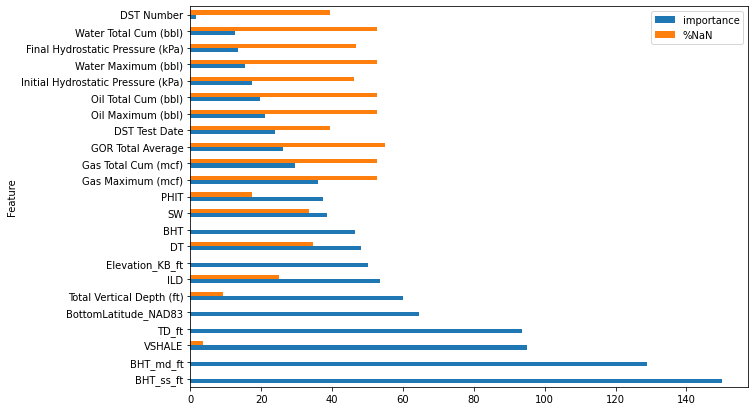

In [ ]:
feature_importances.set_index('Feature').plot.barh(figsize=(10,7))
plt.show()

# 5. Feature Engineering

In [ ]:
# Define function to Plot Outliers
def plot_box(df, params):
  fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(25, 15))
  axs = axs.ravel()

  for ax, i in zip(axs, params):
    ax = sns.boxplot(data=df[i],palette="Set3", ax=ax);
    ax.set_xticks([])
    ax.set_xlabel(i)

In [ ]:
# Define function to show Outliers in a dataframe
def outlier_detector_IQR(df,features,n_IQR, all_data = True):  

  dmin = {}
  dmax = {}
  lower_b = {}
  higher_b = {}
  count_min = {}
  count_max = {}

  for i in features:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit, higher_limit = Q1 - n_IQR*IQR, Q3 +n_IQR*IQR

    lower_b[i] = [np.round(lower_limit,2)]   # min value per Log
    higher_b[i] = [np.round(higher_limit,2)] # max value per Log

    if df[i].min() < lower_limit:      
      dmin[i] = [np.round(df[i].min(),2)]
      count_min[i] = [len(df[i].loc[df[i] < lower_limit])]
    else:
      dmin[i] = '-----'
      count_min[i] = '-----'
    if df[i].max() > higher_limit:
      dmax[i] = [np.round(df[i].max(),2)]
      count_max[i] = [len(df[i].loc[df[i] > higher_limit])]
    else:
      dmax[i] = '-----'
      count_max[i] = '-----'

  lower = pd.DataFrame(lower_b).T.rename(columns={0:'Lower_Limit'})
  min = pd.DataFrame(dmin).T.rename(columns={0:'1st_Min_Outlier'})
  min_count = pd.DataFrame(count_min).T.rename(columns={0:'Total_Min_Out'})
  higher = pd.DataFrame(higher_b).T.rename(columns={0:'Higher_Limit'})  
  max = pd.DataFrame(dmax).T.rename(columns={0:'Last_Max_Outlier'})
  max_count = pd.DataFrame(count_max).T.rename(columns={0:'Total_Max_Out'})  

  return pd.concat([lower,min,min_count,higher,max,max_count],axis=1) 

In [ ]:
# Define a function to repalce Outliers

def outlier_replacer(df,column,min=None,max=None):  

  if min != None:
    min_idx = list(df.loc[df[column]<=min].index.values)
    df.at[min_idx,column] = min
  else:
    pass

  if max != None:
    max_idx = list(df.loc[df[column]>=max].index.values)
    df.at[max_idx,column] = max
  else:
    pass  

  return df

## 5.1 Train Data

In [ ]:
# Check for Geothermal Congruency
len(train[train['TrueTemp']<train['BHT']])

"""
There are 36 wells to be removed in roder to avoid noise generation in the model
"""

'\nThere are 36 wells to be removed in roder to avoid noise generation in the model\n'

In [ ]:
to_remove = train[train['TrueTemp']<train['BHT']].index
train = train.iloc[np.delete(train.index.values,to_remove),:]

In [ ]:
# Define Data to work with base on Feature Selection

selected = np.append(feature_importances['Feature'].values,['UWI','Field','TrueTemp','BottomLongitude_NAD83','RHO','U','GR'])
train = train[selected]
train['Field'] = train[['Field']].replace(to_replace = {'Duvernay':1,'Eaglebine':0})

train['ILD'] = np.log10(train['ILD'])
train = train.set_index('UWI')

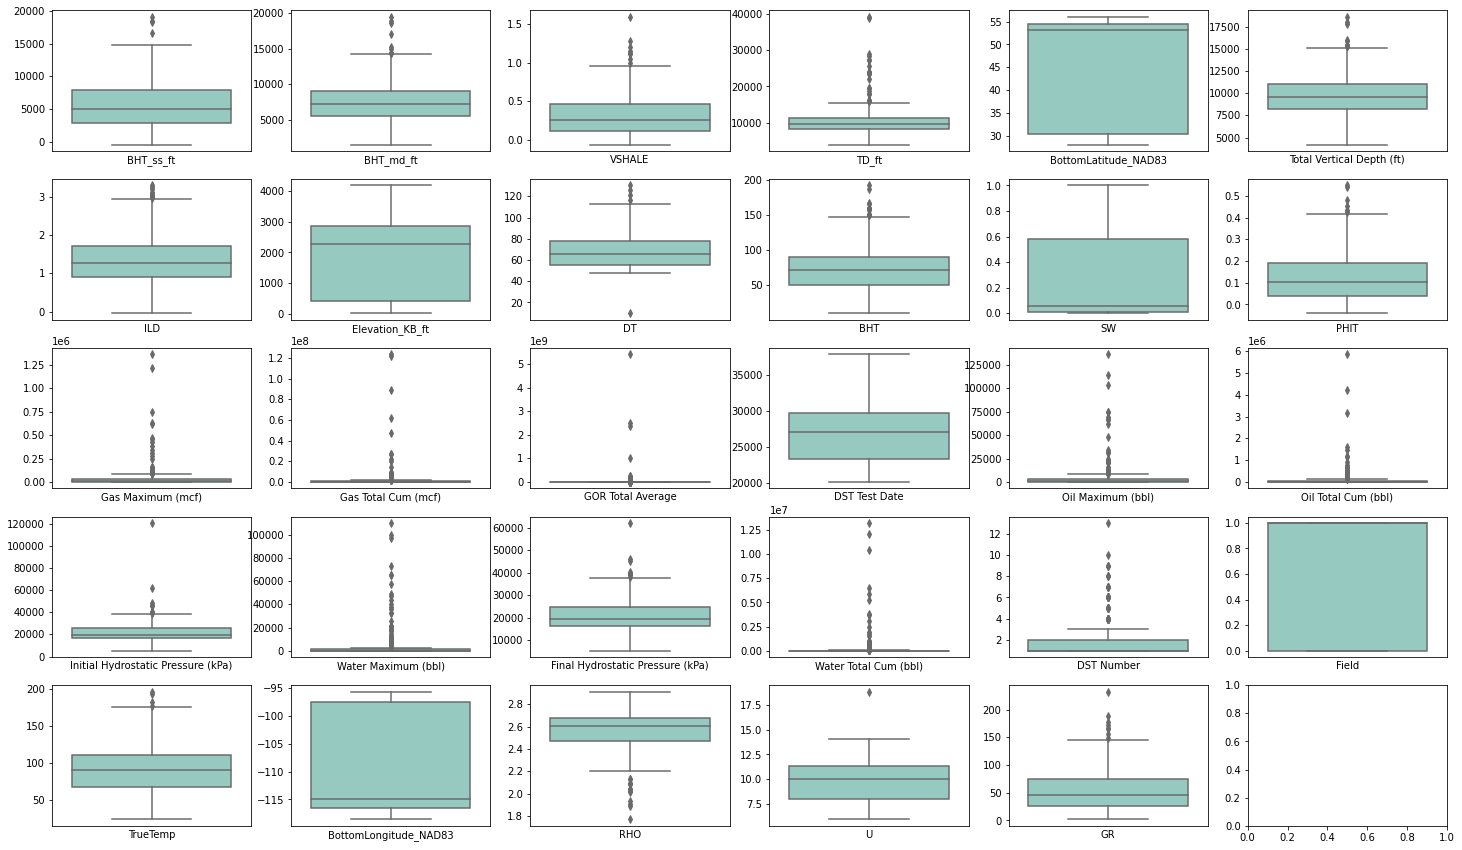

In [ ]:
# Vizualise Outliers
plot_box(train, train.keys())

In [ ]:
# Find Limit of Distributions with 1.5 Standard Deviation
outlier_detector_IQR(train,train.keys(),1.5)

,Lower_Limit,1st_Min_Outlier,Total_Min_Out,Higher_Limit,Last_Max_Outlier,Total_Max_Out
BHT_ss_ft,-4765.88,-----,-----,15515.53,19132,4
BHT_md_ft,257.67,-----,-----,14310.49,19503,9
VSHALE,-0.40,-----,-----,0.98,1.59,8
TD_ft,3570.96,-----,-----,15893.73,39143.7,22
BottomLatitude_NAD83,-5.82,-----,-----,90.75,-----,-----
Total Vertical Depth (ft),3963.00,-----,-----,15255.00,18626,10
ILD,-0.32,-----,-----,2.94,3.29,10
Elevation_KB_ft,-3240.66,-----,-----,6526.20,-----,-----
DT,19.84,9.8,1,113.25,130.28,4
BHT,-8.60,-----,-----,149.16,192.22,11


In [ ]:
# Repalce Outliers with min,max limits

outlier_replacer(train,'Gas Maximum (mcf)',min=0,max=19436.24)
outlier_replacer(train,'Oil Total Cum (bbl)',min=0,max=14803.74)
outlier_replacer(train,'Initial Hydrostatic Pressure (kPa)',min=0,max=39112.16)
outlier_replacer(train,'Water Maximum (bbl)',min=0,max=1565.31) 
outlier_replacer(train,'Gas Total Cum (mcf)',min=0,max=227782.69) 
outlier_replacer(train,'Final Hydrostatic Pressure (kPa)',min=0,max=38256.44)  
outlier_replacer(train,'Oil Maximum (bbl)',min=0,max=3295.82) 
outlier_replacer(train,'GOR Total Average',min=0,max=5663.28)
outlier_replacer(train,'Water Total Cum (bbl)',min=0,max=66035.43) 
outlier_replacer(train,'TD_ft',min=None,max=15830.82)
outlier_replacer(train,'Total Vertical Depth (ft)',min=None,max=15231.25) 
outlier_replacer(train,'VSHALE',min=0,max=0.95) 
outlier_replacer(train,'PHIT',min=0,max=None) 
outlier_replacer(train,'ILD',min=0,max=2.97) 
outlier_replacer(train,'DT',min=20.28,max=112.42)
outlier_replacer(train,'GR',min=0,max=143.62) 
outlier_replacer(train,'U',min=None,max=16.16) 
output.clear()

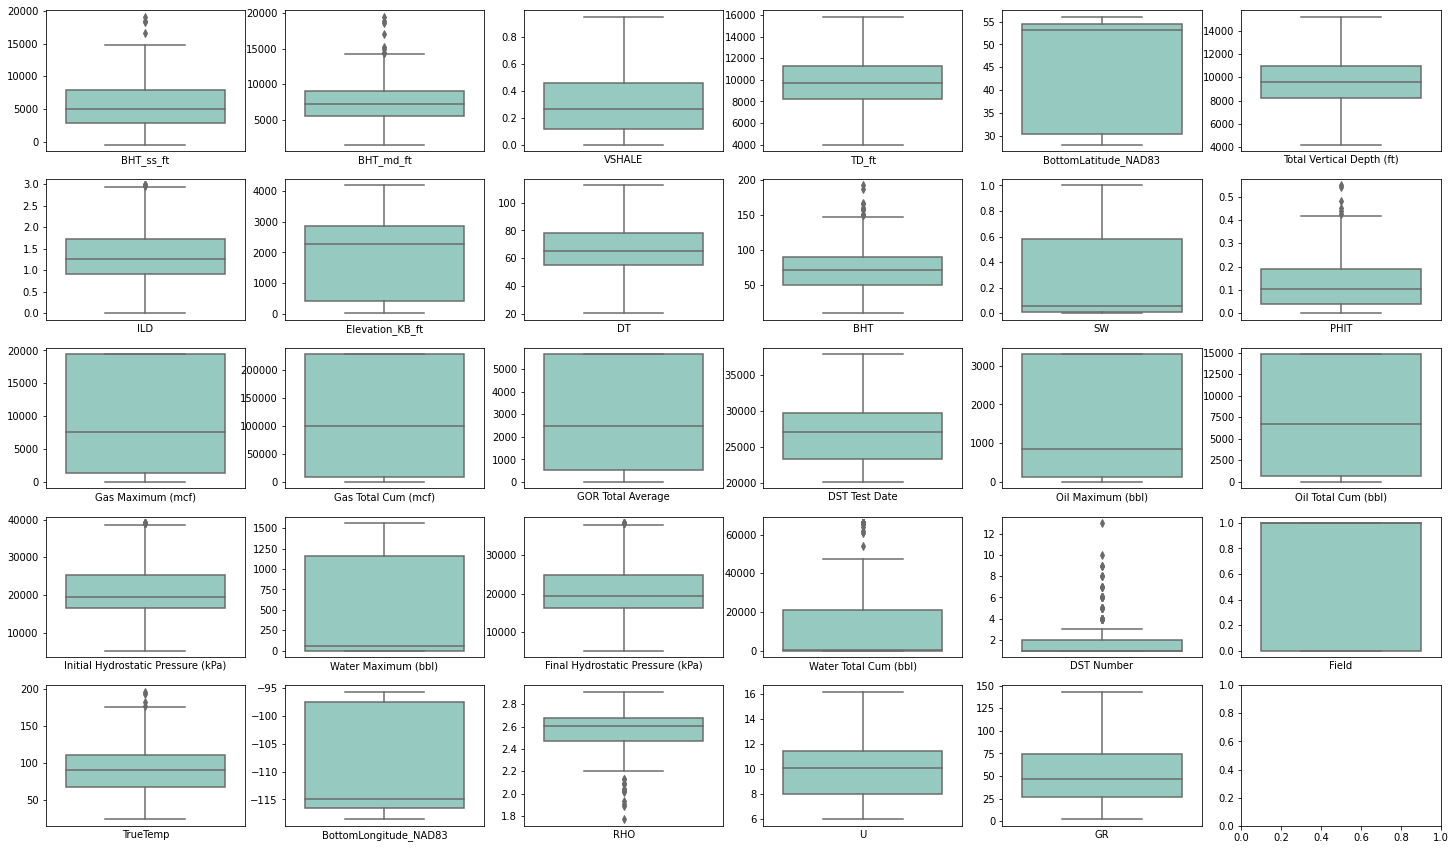

In [ ]:
# Vizualise Outlier Removal
plot_box(train, train.keys())

In [ ]:
# Find Geothermal Gradient

thermal_grad = []

for i in range(0,len(train)):

  if train['Field'].values[i] == 0:
    grad = (((train['TrueTemp'].values[i])-30)+273.15)/(train['BHT_md_ft'].values[i]/3.28)
  elif train['Field'].values[i] == 1:
    grad = (((train['TrueTemp'].values[i])-20)+273.15)/(train['BHT_md_ft'].values[i]/3.28)
  
  thermal_grad.append(grad)
    
train['thermal_grad'] = thermal_grad  # K/m

train.groupby(by='Field')['thermal_grad'].mean()

Field
0    0.143563
1    0.186102
Name: thermal_grad, dtype: float64

In [ ]:
train['thermal_grad'].describe()

count    579.000000
mean       0.168836
std        0.061643
min        0.069282
25%        0.129286
50%        0.152959
75%        0.190080
max        0.604951
Name: thermal_grad, dtype: float64

In [ ]:
# ----- Funtion to Fille Petrophysical Features -------#
""" Fills the NaN's in sequential order from VSHALE to U.
"""

# 1. Define ordet to fill:
#########################################

features = ['BHT_ss_ft','BHT_md_ft','TD_ft','BottomLatitude_NAD83','BottomLongitude_NAD83','Elevation_KB_ft','BHT','Field','thermal_grad',
            'Total Vertical Depth (ft)','VSHALE','GR','PHIT','ILD','SW','DT','RHO','U']             

# 2. Define Log Fill Function
##########################################

def nan_filler(df,log,labels):

  df_filter = df[df[log].notnull()].copy() 
  df_missing = df[df[log].isnull()].copy() 

  X_train_rf = np.array(df_filter[labels])
  y_train_rf = np.array(df_filter[log])

  X_test_rf = np.array(df_missing[labels])

  model_rf = RandomForestRegressor(n_estimators=300,random_state=42)
  
  model_rf.fit(X_train_rf, y_train_rf)

  y_pred = model_rf.predict(X_test_rf)

  n = df[log].isna()
  df.loc[n, log] = y_pred

  return df

# 3. Fill Dataset
########################################
nan = train[features].isna().sum().sum()

while nan > 0:
  for log in features[9:]:
    filled = nan_filler(train[features], log, features[ 0 : np.where(np.array(features) == log )[0][0]])
    train[log] = filled[log]
    nan = train[features].isna().sum().sum()
  if nan == 0:
    break  

In [ ]:
train.isna().sum().sort_values()

BHT_ss_ft                               0
U                                       0
RHO                                     0
BottomLongitude_NAD83                   0
TrueTemp                                0
Field                                   0
GR                                      0
PHIT                                    0
SW                                      0
thermal_grad                            0
DT                                      0
Elevation_KB_ft                         0
BHT_md_ft                               0
VSHALE                                  0
ILD                                     0
TD_ft                                   0
BottomLatitude_NAD83                    0
BHT                                     0
Total Vertical Depth (ft)               0
DST Test Date                         235
DST Number                            235
Initial Hydrostatic Pressure (kPa)    273
Final Hydrostatic Pressure (kPa)      275
Water Maximum (bbl)               

In [ ]:
# Fill NaN's of Production Data with constant (-999)
for i in train.keys():
  if train[i].isna().sum() > 0:
    train.fillna(-999.99,inplace=True)

## 5.1.1 Thermal Properties

In [ ]:
#Reference:
#https://academic.oup.com/gji/article/203/3/1977/2594814
# Table 3.0, Pag.1981

In [ ]:
##########--------Clastics
# train['thermal_cond'] = -3.6 + 2.42*(train['RHO']*1000) - 5.84*train['PHIT'] - 0.1*train['U'] - 0.0113*((train['BHT']-15.5)+273.15) - 1.32*train['VSHALE']
# train['thermal_diff'] = - 0.79 + 1.10*(train['RHO']*1000) - 2.55*train['PHIT'] - 0.08*train['U'] + 0.002*((train['BHT']-15.5)+273.15) - 0.38*train['VSHALE']
# train['spec_heat'] = train['thermal_cond']/((train['RHO']*1000)*train['thermal_diff'])
# train['heat_flux'] = train['thermal_cond']*(train['thermal_grad']) # W/M2

In [ ]:
##########--------Carbonates
train['thermal_cond'] = 1.15 + 2.59*(train['RHO']*1000) + 1.08*train['PHIT'] - 0.28*train['U'] - 0.0083*((train['BHT']-15.5)+273.15) - 1.66*train['VSHALE']
train['thermal_diff'] = 1.59 + 0.57*(train['RHO']*1000) - 0.70*train['PHIT'] - 0.113*train['U'] - 0.0043*((train['BHT']-15.5)+273.15) - 0.45*train['VSHALE']
# train['heat_capacity'] = 584 - 194.4*(train['RHO']*1000) + 1250*train['PHIT'] + 10.93*train['U'] + 4.03*((train['BHT']-15.5)+273.15) - 435.9*train['VSHALE']
train['spec_heat'] = train['thermal_cond']/((train['RHO']*1000)*train['thermal_diff'])
train['heat_flux'] = train['thermal_cond']*(train['thermal_grad']) # W/M2

## 5.2 Test Data

In [ ]:
test = test[selected]
test['Field'] = test[['Field']].replace(to_replace = {'Duvernay':1,'Eaglebine':0})
test['ILD'] = np.log10(test['ILD'])
test = test.set_index('UWI')

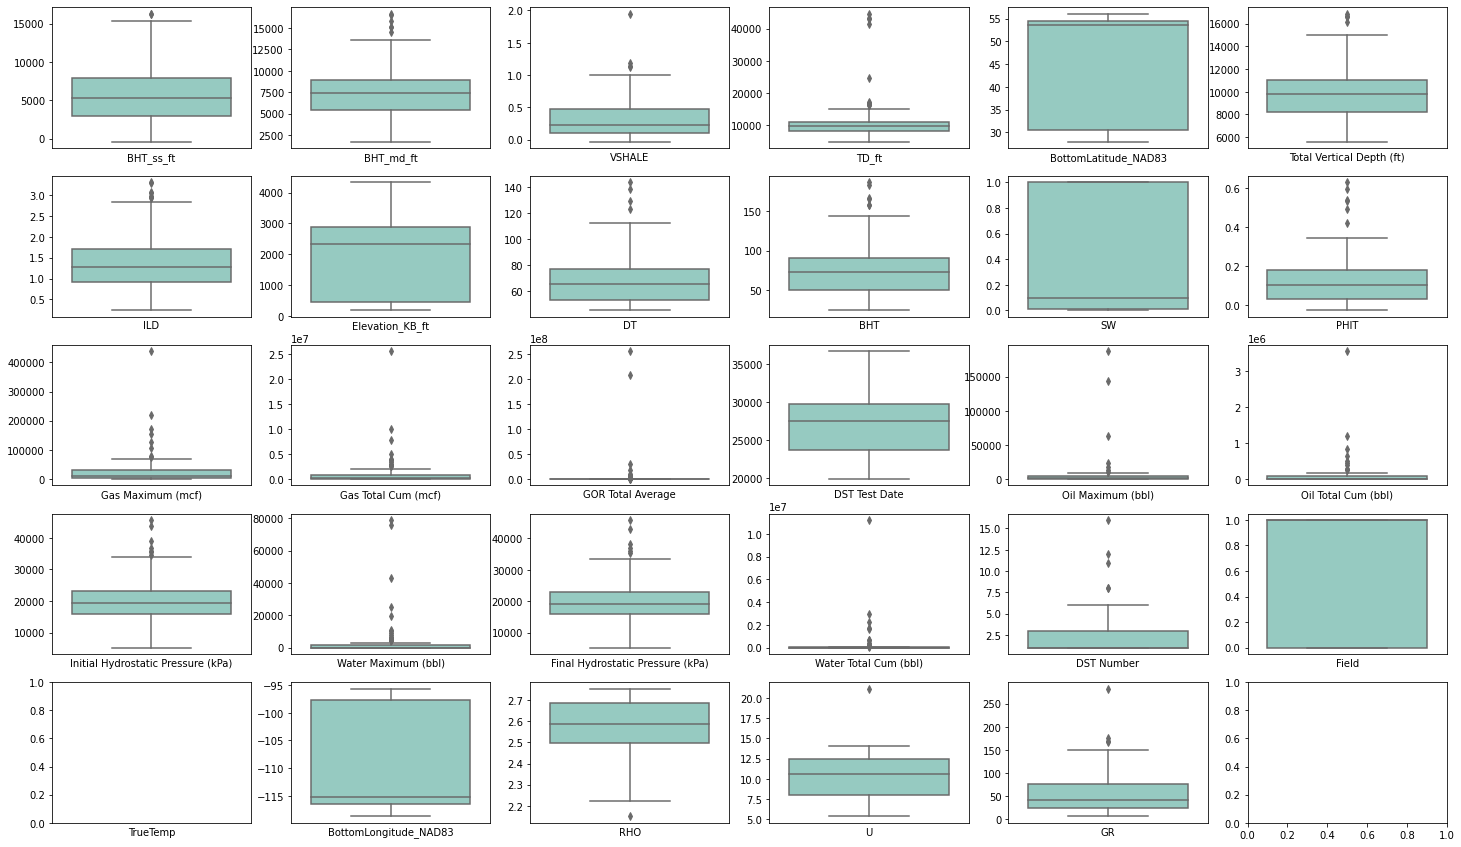

In [ ]:
plot_box(test, test.keys())

In [ ]:
outlier_detector_IQR(test,test.keys(),1.5)

,Lower_Limit,1st_Min_Outlier,Total_Min_Out,Higher_Limit,Last_Max_Outlier,Total_Max_Out
BHT_ss_ft,-4597.85,-----,-----,15474.32,16282,2
BHT_md_ft,292.18,-----,-----,14089.92,16653.8,6
VSHALE,-0.43,-----,-----,1.01,1.95,4
TD_ft,3986.47,-----,-----,15229.22,44619.8,11
BottomLatitude_NAD83,-5.70,-----,-----,90.73,-----,-----
Total Vertical Depth (ft),4048.50,-----,-----,15180.50,16865,4
ILD,-0.26,-----,-----,2.87,3.3,7
Elevation_KB_ft,-3204.05,-----,-----,6554.43,-----,-----
DT,17.64,-----,-----,112.81,143.44,4
BHT,-10.97,-----,-----,152.36,185.56,6


In [ ]:
outlier_replacer(test,'Oil Total Cum (bbl)',min=0,max=215185.48)
outlier_replacer(test,'Initial Hydrostatic Pressure (kPa)',min=0,max=34086.60)
outlier_replacer(test,'Water Maximum (bbl)',min=0,max=3759.20) 
outlier_replacer(test,'Gas Maximum (mcf)',min=0,max=72158.76)
outlier_replacer(test,'Gas Total Cum (mcf)',min=0,max=2121329.22) 
outlier_replacer(test,'Final Hydrostatic Pressure (kPa)',min=0,max=33843.45)  
outlier_replacer(test,'Oil Maximum (bbl)',min=0,max=9898.56) 
outlier_replacer(test,'GOR Total Average',min=0,max=276093.68)
outlier_replacer(test,'Water Total Cum (bbl)',min=0,max=93234.20) 
outlier_replacer(test,'TD_ft',min=None,max=15229.22)
outlier_replacer(test,'Total Vertical Depth (ft)',min=None,max=15180.50) 
outlier_replacer(test,'VSHALE',min=0,max=1) 
outlier_replacer(test,'PHIT',min=0,max=0.41) 
outlier_replacer(test,'ILD',min=0,max=2.87) 
outlier_replacer(test,'DT',min=17.64,max=112.81)
outlier_replacer(test,'GR',min=0,max=150.91) 
outlier_replacer(test,'U',min=None,max=19.05) 
output.clear()

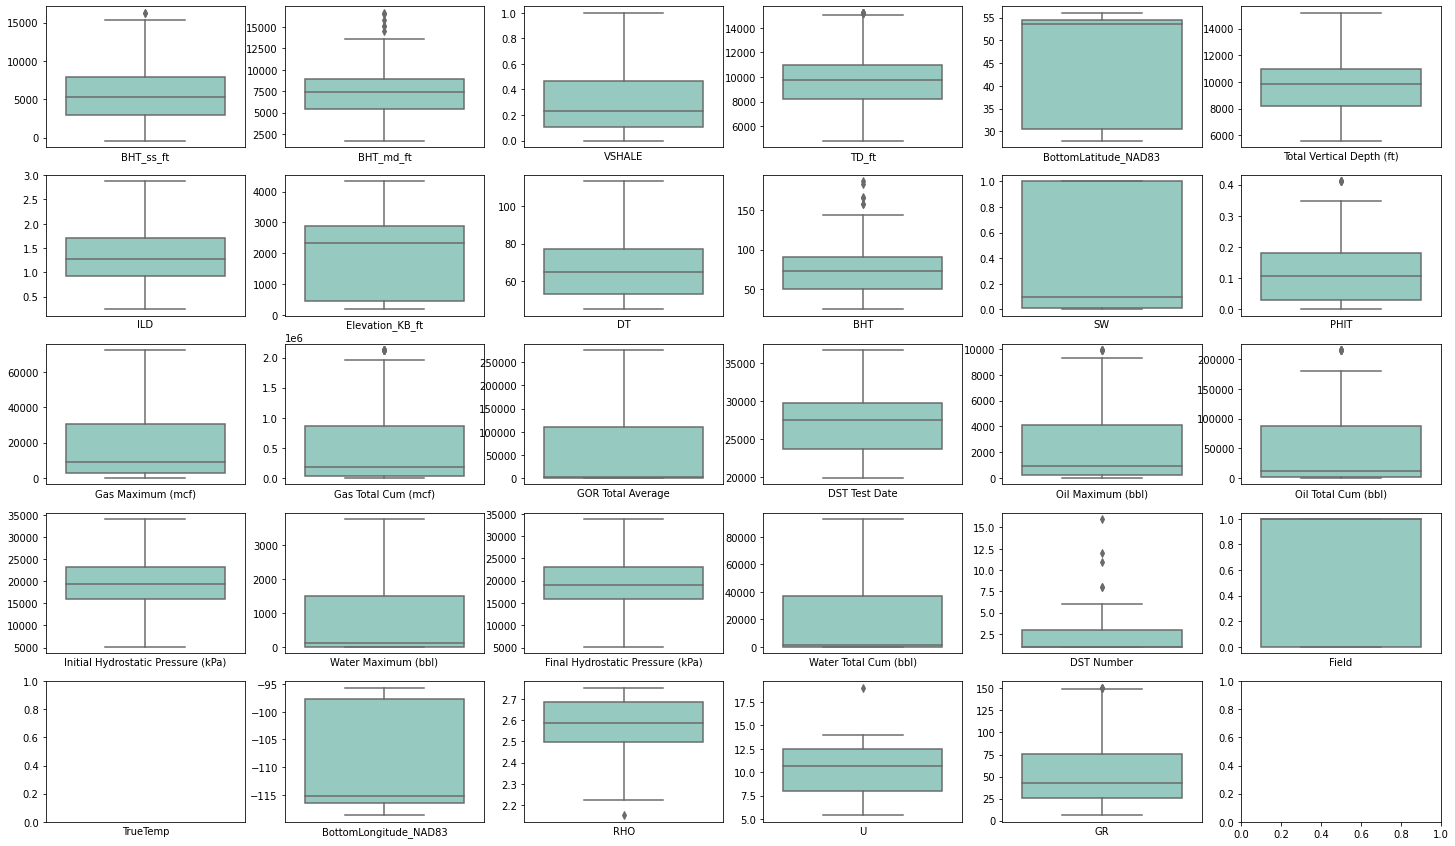

In [ ]:
plot_box(test, test.keys())

In [ ]:
test_grad = []

for i in range(0,len(test)):

  if test['Field'].values[i] == 0:
    grad = (((test['BHT'].values[i]+18.818)-30)+273.15)/(test['BHT_md_ft'].values[i]/3.28)
  elif test['Field'].values[i] == 1:
    grad = (((test['BHT'].values[i]+14.65)-20)+273.15)/(test['BHT_md_ft'].values[i]/3.28)
  
  test_grad.append(grad)
    
test['thermal_grad'] = test_grad  # K/m

test.groupby(by='Field')['thermal_grad'].mean()

Field
0    0.138618
1    0.188528
Name: thermal_grad, dtype: float64

In [ ]:
test['thermal_grad'].describe()

count    206.000000
mean       0.169388
std        0.067284
min        0.074901
25%        0.128488
50%        0.150224
75%        0.191339
max        0.568016
Name: thermal_grad, dtype: float64

In [ ]:
# 1. Define ordet to fill:
#########################################

features = ['BHT_ss_ft','BHT_md_ft','TD_ft','BottomLatitude_NAD83','BottomLongitude_NAD83','Elevation_KB_ft','BHT','Field','thermal_grad',
            'Total Vertical Depth (ft)','VSHALE','GR','PHIT','ILD','SW','DT','RHO','U'] 
            
# 2. Define Log Fill Function
##########################################

def nan_filler(df,log,labels):

  df_filter = df[df[log].notnull()].copy() 
  df_missing = df[df[log].isnull()].copy() 

  X_train_rf = np.array(df_filter[labels])
  y_train_rf = np.array(df_filter[log])

  X_test_rf = np.array(df_missing[labels])

  model_rf = RandomForestRegressor(n_estimators=300,random_state=42)
  
  model_rf.fit(X_train_rf, y_train_rf)

  y_pred = model_rf.predict(X_test_rf)

  n = df[log].isna()
  df.loc[n, log] = y_pred

  return df

# 3. Fill Dataset
########################################
nan = test[features].isna().sum().sum()

while nan > 0:
  for log in features[9:]:
    filled = nan_filler(test[features], log, features[ 0 : np.where(np.array(features) == log )[0][0]])
    test[log] = filled[log]
    nan = test[features].isna().sum().sum()
  if nan == 0:
    break  

In [ ]:
# Fill NaN's of Production Data with constant (-999)
for i in test.keys():
  if test[i].isna().sum()>0:
    test.fillna(-999.99,inplace=True)

## 5.2.1 Thermal Properties

In [ ]:
# ##########--------Clastics
# test['thermal_cond'] = -3.6 + 2.42*(test['RHO']*1000) - 5.84*test['PHIT'] - 0.1*test['U'] - 0.0113*((test['BHT']-15.5)+273.15) - 1.32*test['VSHALE']
# test['thermal_diff'] = - 0.79 + 1.10*(test['RHO']*1000) - 2.55*test['PHIT'] - 0.08*test['U'] + 0.002*((test['BHT']-15.5)+273.15) - 0.38*test['VSHALE']
# test['spec_heat'] = test['thermal_cond']/((test['RHO']*1000)*test['thermal_diff'])
# test['heat_flux'] = test['thermal_cond']*(test['thermal_grad']) # W/M2

In [ ]:
##########--------Carbonates

test['thermal_cond'] = 1.15 + 2.59*(test['RHO']*1000) + 1.08*test['PHIT'] - 0.28*test['U'] - 0.0083*((test['BHT']-15.5)+273.15) - 1.66*test['VSHALE']
test['thermal_diff'] = 1.59 + 0.57*(test['RHO']*1000) - 0.70*test['PHIT'] - 0.113*test['U'] - 0.0043*((test['BHT']-15.5)+273.15) - 0.45*test['VSHALE']
# test['heat_capacity'] = 584 - 194.4*(test['RHO']*1000) + 1250*test['PHIT'] + 10.93*test['U'] + 4.03*((test['BHT']-15.5)+273.15) - 435.9*test['VSHALE']
test['spec_heat'] = test['thermal_cond']/((test['RHO']*1000)*test['thermal_diff'])
test['heat_flux'] = test['thermal_cond']*(test['thermal_grad']) # W/M2

# 6. Model Building

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train.drop('TrueTemp',axis=1).values
y_train = train['TrueTemp'].values.reshape(-1,1)

forest = RandomForestRegressor(n_estimators=5000)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error as mse 

X_test = test.drop('TrueTemp',axis=1).values
prediction = forest.predict(X_test)
mse(reference['TrueTemp'],prediction)

2.608724088189718

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(reference['TrueTemp'],prediction)

0.8330280201833937

In [ ]:
prediction

array([112.52130822,  55.03375506,  95.13206244,  92.32630378,
        89.72756089,  38.24830279,  97.82370133, 107.574962  ,
        43.31884202,  55.15131165,  66.5029    ,  96.48164111,
        71.75626511,  68.06985368,  78.91300644,  74.536884  ,
        72.55824156,  66.94177333,  86.97886111,  64.54137701,
        66.107298  ,  53.03017921,  65.63105   ,  94.94267511,
        83.95732778, 109.72309556,  84.03065533, 108.48155067,
        56.18982699,  65.95038844,  54.48216904,  71.70689067,
        40.01930644,  72.52401467, 109.226276  , 111.79161845,
       105.52994378,  78.23281778,  53.81951914,  37.28975889,
        99.11529644,  76.90726178,  54.18045649,  99.10702444,
        96.77825044,  37.72358156,  72.67811978,  78.77474467,
        76.35200556,  68.15538667,  94.27805089, 120.88669956,
       111.52352778,  81.27815733,  38.32920956,  67.05390867,
        67.08050869,  66.95816644,  68.38821333,  63.82606067,
        66.53233844,  76.73848822,  63.78083267,  65.86

In [ ]:
test['TrueTemp'] = prediction

In [ ]:
import zipfile
rf_prediction = pd.DataFrame(prediction,index=[test.index],columns=['TrueTemp'])
rf_prediction.to_csv('predictions.csv')
zipfile.ZipFile('predictions.zip', mode='w').write("predictions.csv")

## XGBOOST

In [ ]:
# import xgboost as xgb

# model_xgb = xgb.XGBRegressor(n_estimators=3000,objective='reg:squarederror',max_depth=300,learning_rate=0.05)

# model_xgb.fit(X_train,y_train)
# prediction_xgb = model_xgb.predict(X_test)
# mse(reference['TrueTemp'].values, prediction_xgb)

11.027453332825827

In [ ]:
# xgb_prediction = pd.DataFrame(prediction_xgb,index=[test['UWI'].values],columns=['TrueTemp'])
# xgb_prediction.to_csv('predictions.csv')
# zipfile.ZipFile('predictions.zip', mode='w').write("predictions.csv")

## NN

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dense, Dropout
# from keras.models import Sequential
# from keras.optimizers import Adam

# adam = Adam(learning_rate=0.01,
#             beta_1=0.9,
#             beta_2=0.999,
#             epsilon=1e-07,
#             amsgrad=True)

# batch_size = 32
# epochs = 500

In [ ]:
# X_scaler = MinMaxScaler()
# y_scaler = MinMaxScaler()

# X = train.drop('TrueTemp',axis=1).values
# y = train['TrueTemp'].values.reshape(-1,1)

# X_t= test.drop('TrueTemp',axis=1).values

In [ ]:
# X_train = X_scaler.fit_transform(X)
# y_train = y_scaler.fit_transform(y)
# X_test = X_scaler.fit_transform(X_t)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# model = Sequential()

# model.add(Dense(64, activation='relu',input_shape = (X_train.shape[1],)))
# # model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(48, activation='relu'))
# model.add(Dense(24, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(8, activation='relu'))
# # model.add(Dropout(0.1))
# model.add(Dense(4, activation='relu'))
# # model.add(Dropout(0.1))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=adam, loss='mse', metrics=['mae'])
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

# nn_prediction = y_scaler.inverse_transform(model.predict(X_test)) 

# print('/n','MSE: ',mse(reference['TrueTemp'].values,nn_prediction))

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 0.0280 - mae: 0.1331
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.1045
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0115 - mae: 0.0859
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0098 - mae: 0.0746
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0742
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0067 - mae: 0.0632
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0050 - mae: 0.0498
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0465
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0430
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0413
Epoch 11/500
20/20 [==============================] - 0s 2m

In [ ]:
# nn_prediction

array([[124.37317 ],
       [ 33.74794 ],
       [ 92.259674],
       [ 79.90582 ],
       [ 85.95956 ],
       [ 31.30931 ],
       [ 95.18647 ],
       [105.19954 ],
       [ 31.30931 ],
       [ 35.315876],
       [ 63.38588 ],
       [ 98.64502 ],
       [ 66.06961 ],
       [ 71.43596 ],
       [ 74.55487 ],
       [ 80.12469 ],
       [ 68.24638 ],
       [ 61.003014],
       [ 84.14312 ],
       [ 51.663193],
       [ 63.71417 ],
       [ 31.30931 ],
       [ 60.312035],
       [ 96.68412 ],
       [ 99.456795],
       [110.42291 ],
       [ 72.124176],
       [108.09313 ],
       [ 31.30931 ],
       [ 74.641525],
       [ 39.083115],
       [ 69.48148 ],
       [ 31.30931 ],
       [ 69.59208 ],
       [100.140144],
       [103.33873 ],
       [109.241615],
       [ 77.36978 ],
       [ 45.96197 ],
       [ 31.30931 ],
       [ 99.78386 ],
       [ 77.85476 ],
       [ 31.30931 ],
       [ 93.39816 ],
       [ 97.5505  ],
       [ 31.30931 ],
       [ 65.929504],
       [112.4

## MLP

In [ ]:
# X_train = train.drop('TrueTemp',axis=1).copy()
# y_train = train[['TrueTemp']].copy()

# X_test = test.drop('TrueTemp',axis=1).copy()

In [ ]:
# from sklearn.preprocessing import  MinMaxScaler

# def minmax_scaler(data, minmaxrange=(0,1)):
#     scaler = MinMaxScaler(feature_range = minmaxrange)
#     scaled_data = scaler.fit_transform(data)
#     return scaled_data, scaler

In [ ]:
# X_train_scaled, X_scaler = minmax_scaler(X_train, minmaxrange=(0,1))
# X_test_scaled = X_scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

# y_train_scaled, y_scaler = minmax_scaler(y_train.values.reshape(-1,1), minmaxrange=(0,1))

# y_train_scaled = pd.DataFrame(y_train_scaled, index=y_train.index, columns=y_train.columns)

In [ ]:
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers 
# from keras.layers import Dense, Dropout
# from keras.models import Sequential
# from tensorflow.keras import initializers
# from keras.optimizers import Adam


# n_members = 10
# model_store = []

# history_store = []

# for i in range(n_members): 
#     model = Sequential()
    
#     # Adding layers
#     model.add(layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform'))
#     model.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
#     model.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
#     model.add(layers.Dense(8, activation='relu', kernel_initializer='he_uniform'))
#     model.add(layers.Dense(4, activation='relu', kernel_initializer='he_uniform'))
#     model.add(layers.Dense(2, activation='relu', kernel_initializer='he_uniform'))
#     model.add(layers.Dense(y_train_scaled.shape[1], activation='linear'))
    
#     # Setting optimizer
#     opt = keras.optimizers.Adam(learning_rate=0.001)
    
#     # Compile model and add callbacks
#     model.compile(optimizer=opt, loss='mse')
    
#     # Fit and save! 
#     history_store.append(model.fit(X_train_scaled, 
#                                    y_train_scaled, 
#                                    epochs=1000, validation_split=0.1,
#                                    shuffle=True, batch_size=310,
#                                    verbose=0))
#     model_store.append(model)
    
#     loss = history_store[i].history['loss']
#     epochs = range(len(loss))
#     print('-------------------------------------------------- Completed Training of Model #', i)
#     print('-------------------------------------------------- Total Epochs Range:', epochs )
#     print('-----------------------------------------------------------------------------------')

-------------------------------------------------- Completed Training of Model # 0
-------------------------------------------------- Total Epochs Range: range(0, 1000)
-----------------------------------------------------------------------------------
-------------------------------------------------- Completed Training of Model # 1
-------------------------------------------------- Total Epochs Range: range(0, 1000)
-----------------------------------------------------------------------------------
-------------------------------------------------- Completed Training of Model # 2
-------------------------------------------------- Total Epochs Range: range(0, 1000)
-----------------------------------------------------------------------------------
-------------------------------------------------- Completed Training of Model # 3
-------------------------------------------------- Total Epochs Range: range(0, 1000)
------------------------------------------------------------------------

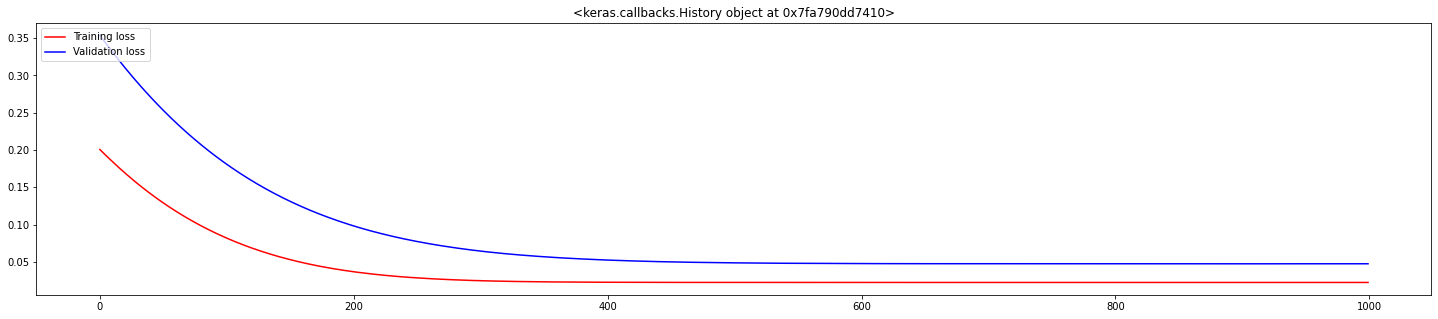

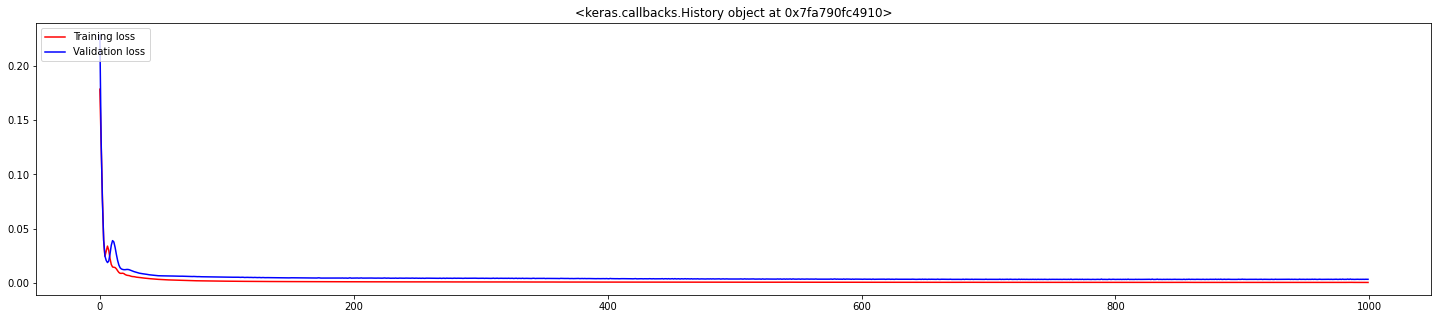

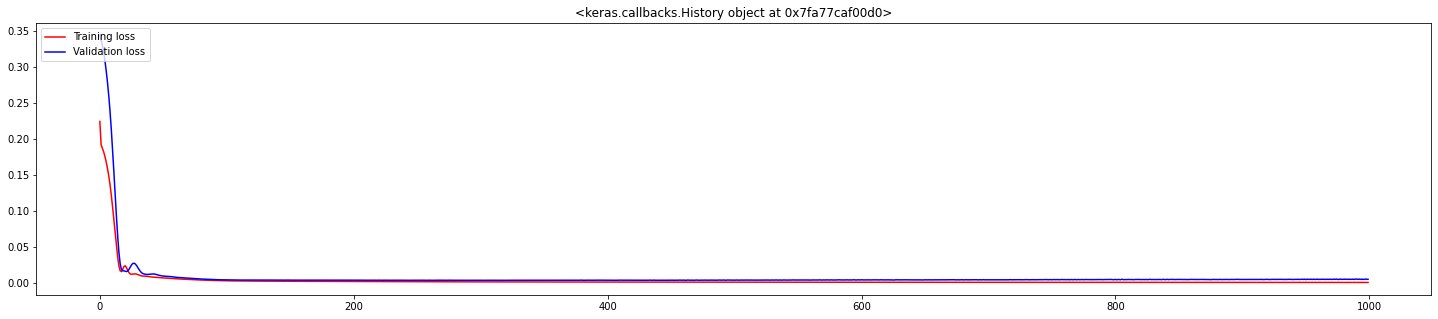

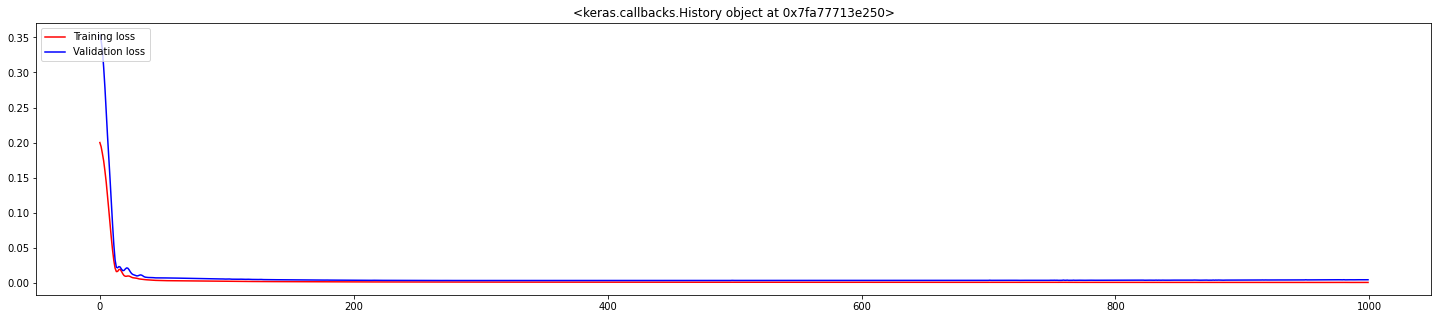

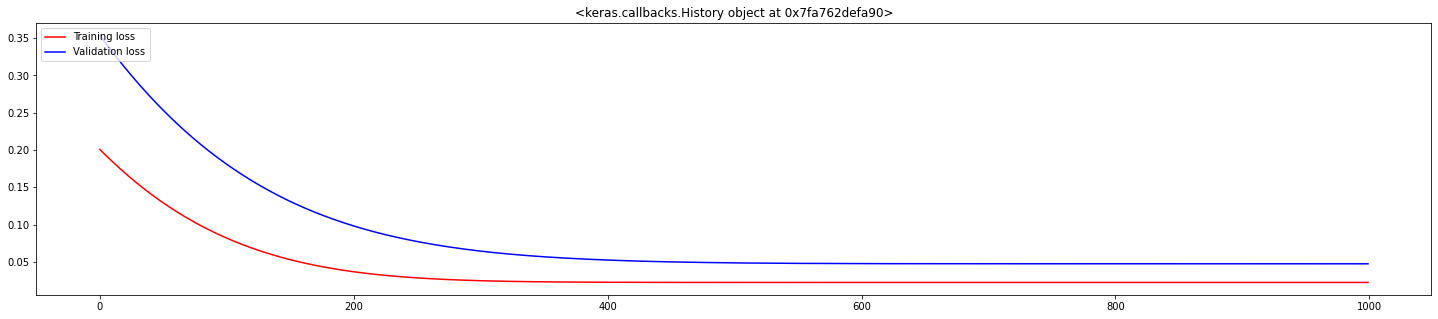

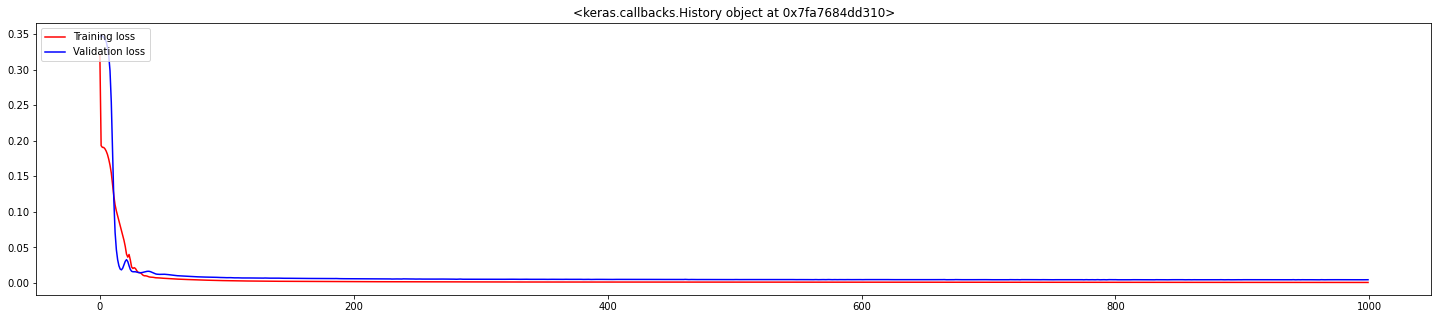

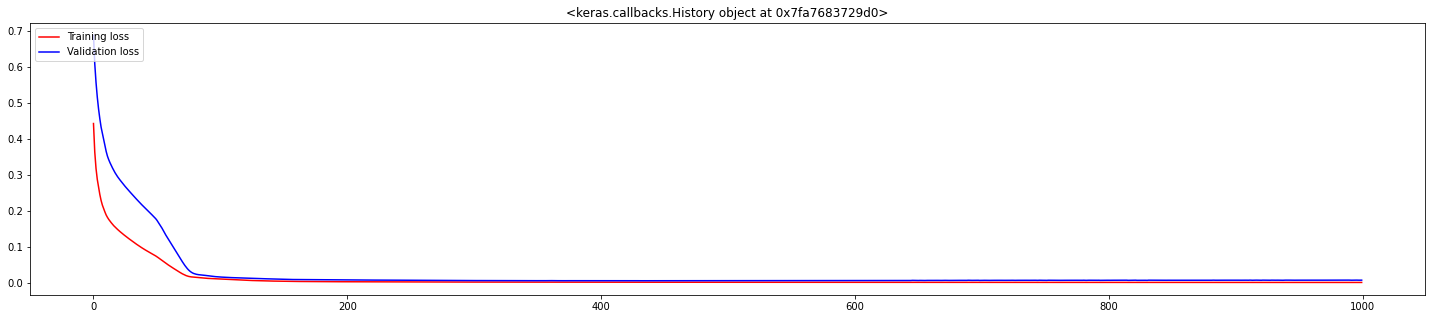

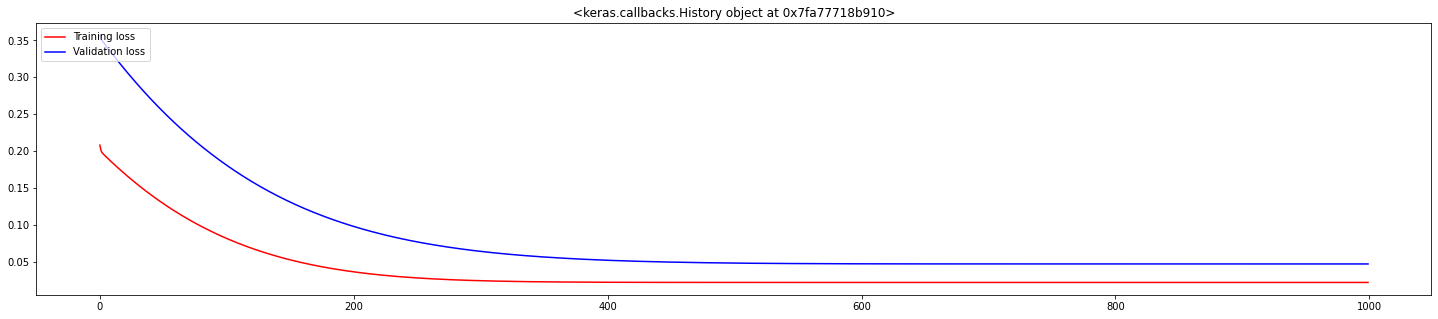

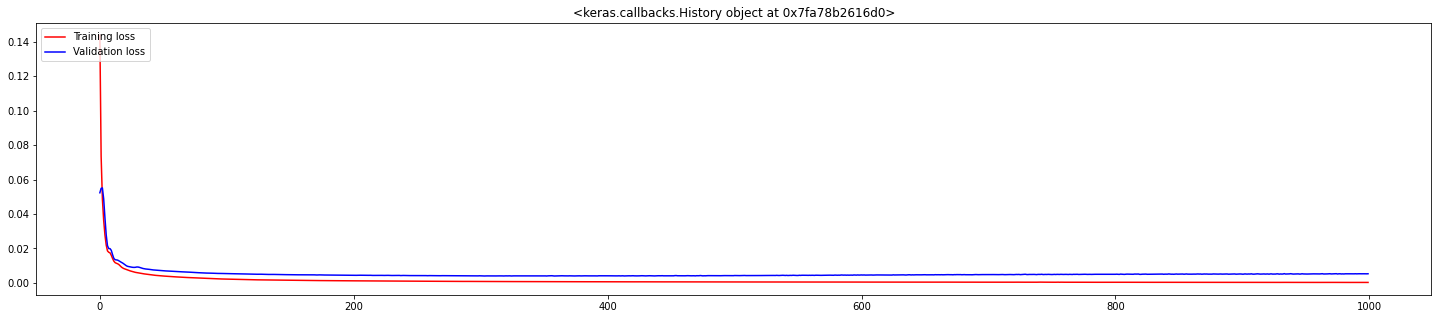

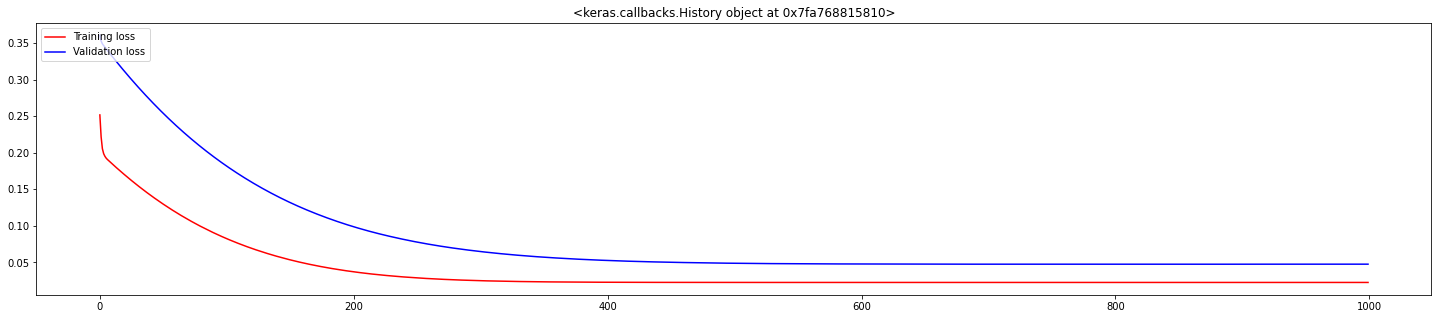

In [ ]:
# for history in history_store:
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     epochs = range(len(loss))
#     plt.figure(figsize=(25,5))
#     plt.plot(epochs, loss, 'r', label='Training loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
#     plt.legend(loc='upper left')
#     plt.title(str(history))

In [ ]:
# yhats = [y_scaler.inverse_transform(model.predict(X_test_scaled)) for model in model_store]
# yhats = np.array(yhats)
# prediction = yhats.mean(0)

In [ ]:
# prediction

array([[110.13722 ],
       [ 65.29628 ],
       [ 90.19905 ],
       [ 84.17518 ],
       [ 84.69489 ],
       [ 70.29015 ],
       [ 93.04143 ],
       [251.54944 ],
       [ 89.1929  ],
       [ 67.07695 ],
       [116.17869 ],
       [118.29514 ],
       [ 80.59116 ],
       [116.46957 ],
       [ 83.884705],
       [249.07344 ],
       [ 78.56881 ],
       [ 73.27031 ],
       [ 84.64217 ],
       [ 73.057816],
       [ 76.2675  ],
       [ 65.589455],
       [ 75.1717  ],
       [ 90.61529 ],
       [ 83.9156  ],
       [101.08517 ],
       [ 81.14415 ],
       [ 95.03014 ],
       [ 64.0692  ],
       [ 90.65176 ],
       [ 91.178116],
       [ 75.73996 ],
       [ 63.344933],
       [ 77.33873 ],
       [ 96.6425  ],
       [ 96.934685],
       [102.14795 ],
       [ 83.21331 ],
       [ 69.14793 ],
       [ 59.89214 ],
       [ 92.826065],
       [ 78.558014],
       [ 63.98053 ],
       [ 92.00153 ],
       [ 93.95152 ],
       [ 55.066246],
       [262.32233 ],
       [ 81.3

In [ ]:
# test['TrueTemp'] = prediction
# test = test.reset_index()
# test = test.rename(columns={'index':'UWI'})
# test[['UWI','TrueTemp']].to_csv('predictions.csv')

# 7. Results

## 7.1 Geothermal Gradient

In [ ]:
data = pd.concat([train,test],axis=0)

In [ ]:
true_tg = []

for i in range(0,len(data)):

  if data['Field'].values[i] == 0:
    grad = (((data['TrueTemp'].values[i])-30)+273.15)/(data['BHT_md_ft'].values[i]/3.28)
  elif data['Field'].values[i] == 1:
    grad = (((data['TrueTemp'].values[i])-20)+273.15)/(data['BHT_md_ft'].values[i]/3.28)
  
  true_tg.append(grad)
    
data['thermal_gradient'] = true_tg  # K/m

data.groupby(by='Field')['thermal_grad'].mean()

Field
0    0.142319
1    0.186756
Name: thermal_grad, dtype: float64

In [ ]:
data['thermal_gradient'].describe()

count    785.000000
mean       0.168937
std        0.062356
min        0.069282
25%        0.129375
50%        0.152610
75%        0.190714
max        0.604951
Name: thermal_gradient, dtype: float64

In [ ]:
neighbors

,UWI,lat,lon,Field,BHT,TrueTemp,NN_list
0,100010107020W500,55.027981,-116.903553,Duvernay,48.330000,60.97,"[298, 337, 208, 107, 355]"
1,100010608109W500,55.987511,-115.390554,Duvernay,34.260000,63.98,"[253, 344, 167, 130, 48]"
2,100011206021W400,54.167413,-113.002674,Duvernay,29.000000,39.07,"[54, 371, 218, 357, 7]"
3,100011506915W500,54.969037,-116.188158,Duvernay,64.000000,69.47,"[237, 78, 186, 31, 187]"
4,100011804403W500,52.787328,-114.415621,Duvernay,68.000000,75.23,"[345, 240, 109, 174, 264]"
...,...,...,...,...,...,...,...
816,42493306840000,28.932552,-98.232407,Eaglebine,75.555556,NaN,"[819, 743, 742, 818, 793]"
817,42493311060000,29.126904,-98.313380,Eaglebine,57.222222,NaN,"[819, 818, 816, 743, 793]"
818,42493311680000,29.094957,-98.126468,Eaglebine,67.222222,NaN,"[819, 817, 816, 793, 743]"
819,42493322270000,29.059883,-98.210294,Eaglebine,73.333333,NaN,"[818, 817, 816, 793, 743]"


In [ ]:
neighbors = neighbors.iloc[np.delete(neighbors.index.values,to_remove),:]
data[['NN_list']] = neighbors['NN_list'].values
data = data.reset_index()
data = data.rename(columns={'BottomLatitude_NAD83':'latitude','BottomLongitude_NAD83':'longitude','index':'UWI'})

In [ ]:
data['heat_flux'] = data['thermal_cond']*(data['thermal_grad']) 

In [ ]:
def plot_field(field=None):

  """
  Function to plot well location along with Geothrmal Gradient
    Arguments:
      - None: To plot both field
      - 0: Eaglebine
      - 1:Duvernay
  """

  if field == None:

    fig = px.scatter(data, x=data.longitude, y=data.latitude, color=data.TrueTemp, 
                    size=data.thermal_gradient, hover_data=[data.index,data.NN_list])
    fig.update_layout(width = 1400, height = 600, title = "Neighbor Wells")
    fig.show()

  elif field == 0:

    reservoir = data.loc[data['Field']==0]
    fig = px.scatter(reservoir, x=reservoir.longitude, y=reservoir.latitude, color=reservoir.TrueTemp, 
                    size=reservoir.heat_flux, hover_data=[reservoir.index,reservoir.TrueTemp,reservoir.NN_list])
    fig.update_layout(width = 1400, height = 600, title = "Eaglebine")
    fig.show()

  elif field == 1:

    reservoir = data.loc[data['Field']==1]
    fig = px.scatter(reservoir, x=reservoir.longitude, y=reservoir.latitude, color=reservoir.TrueTemp, 
                    size=reservoir.heat_flux, hover_data=[reservoir.index,reservoir.TrueTemp,reservoir.NN_list])
    fig.update_layout(width = 1400, height = 600, title = "Duvernay")
    fig.show()        

In [ ]:
plot_field(0) 

In [ ]:
plot_field(1) 

In [ ]:
plot_field() 

In [ ]:
data[data['Field']==0][['TrueTemp','thermal_gradient','heat_flux']].describe()

,TrueTemp,thermal_gradient,heat_flux
count,314.000000,314.000000,314.000000
mean,114.109893,0.142531,947.785437
std,23.387614,0.047018,257.961009
min,45.838889,0.069282,496.863354
25%,101.894398,0.119521,799.757781
50%,111.663889,0.136526,932.808886
75%,123.384012,0.148730,1017.684959
max,196.027778,0.501583,2615.315268


In [ ]:
eaglebine = data[data['Field']==0]

temp = eaglebine[eaglebine['TrueTemp']>123] # 3rd Quartile of True Temp
eaglebine_prospectives = temp[temp['heat_flux']>257] # Standard Deviation for Heat Flux
len(eaglebine_prospectives)

82

In [ ]:
fig = px.scatter(eaglebine_prospectives, x=eaglebine_prospectives.longitude, y=eaglebine_prospectives.latitude, color=eaglebine_prospectives.TrueTemp, 
                size=eaglebine_prospectives.heat_flux, hover_data=[eaglebine_prospectives.index,eaglebine_prospectives.TrueTemp,eaglebine_prospectives.NN_list])
fig.update_layout(width = 1400, height = 600, title = "Eaglebine")
fig.show()

In [ ]:
data[data['Field']==1][['TrueTemp','thermal_gradient','heat_flux']].describe()

,TrueTemp,thermal_gradient,heat_flux
count,471.000000,471.000000,471.000000
mean,75.434139,0.186542,1202.476253
std,20.514810,0.065095,388.831387
min,24.140000,0.094924,571.502540
25%,63.045508,0.143162,950.278536
50%,71.271678,0.181510,1175.404808
75%,91.520000,0.208409,1319.696551
max,128.980000,0.604951,3660.261589


In [ ]:
duvernay = data[data['Field']==1]

temp = duvernay[duvernay['TrueTemp']>110] # 3rd Quartile of True Temp
duvernay_prospectives = temp[temp['heat_flux']>388] # Standard Deviation for Heat Flux
len(duvernay_prospectives)

30

In [ ]:
fig = px.scatter(duvernay_prospectives, x=duvernay_prospectives.longitude, y=duvernay_prospectives.latitude, color=duvernay_prospectives.TrueTemp, 
                size=duvernay_prospectives.heat_flux, hover_data=[duvernay_prospectives.index,duvernay_prospectives.TrueTemp,duvernay_prospectives.NN_list])
fig.update_layout(width = 1400, height = 600, title = "Duvernay")
fig.show()

## 7.2 Geothrmal Capacity

In [ ]:
# Reference 
# https://link.springer.com/referenceworkentry/10.1007/978-1-4939-2493-6_229-3
# Eq.(2)

In [ ]:
Es = ((data['spec_heat'].values/(data['thermal_cond'].values*30))*0.1*(1000/3.28)*(data['BHT_md_ft'].values/3.28))*0.1+1

In [ ]:
Ec = (Es*30*(data['Water Total Cum (bbl)']))/(np.log(1+(data['Water Total Cum (bbl)'])*30))
Ec = pd.DataFrame(Ec).rename(columns={'Water Total Cum (bbl)':'Geo_Power'})
Ec.describe()

,Geo_Power
count,200.000000
mean,71641.357945
std,64900.116486
min,38.870919
25%,11364.959057
50%,43623.600969
75%,136640.251821
max,188448.633791
